# Sampling of a Sinusoidal Signal and Reconstruction of Analog Signal.

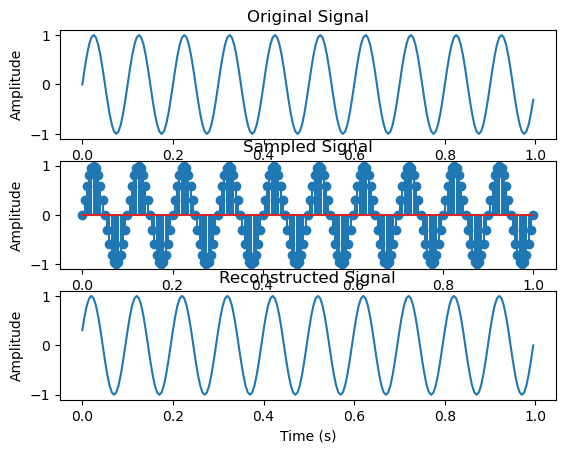

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the signal
f = 10  # Frequency of the sinusoid (in Hz)
fs = 200  # Sampling rate (in Hz)
t = np.arange(0, 1, 1 / fs)  # Time vector
x = np.sin(2 * np.pi * f * t)  # Generate the sinusoidal signal

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Sample the signal
Ts = 1 / fs  # Sampling interval (in seconds)
n = np.arange(0, 1 + Ts, Ts)  # Sampling instants
xn = np.sin(2 * np.pi * f * n)  # Sampled signal

# Plot the sampled signal
plt.subplot(3, 1, 2)
plt.stem(n, xn)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')

# Reconstruct the analog signal using ideal reconstruction
xr = np.zeros_like(t)  # Initialize the reconstructed signal
for i in range(len(n)):
    xr += xn[i] * np.sinc((t - (i - 1) * Ts) / Ts)

# Plot the reconstructed signal
plt.subplot(3, 1, 3)
plt.plot(t, xr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')

plt.show()


# DFT

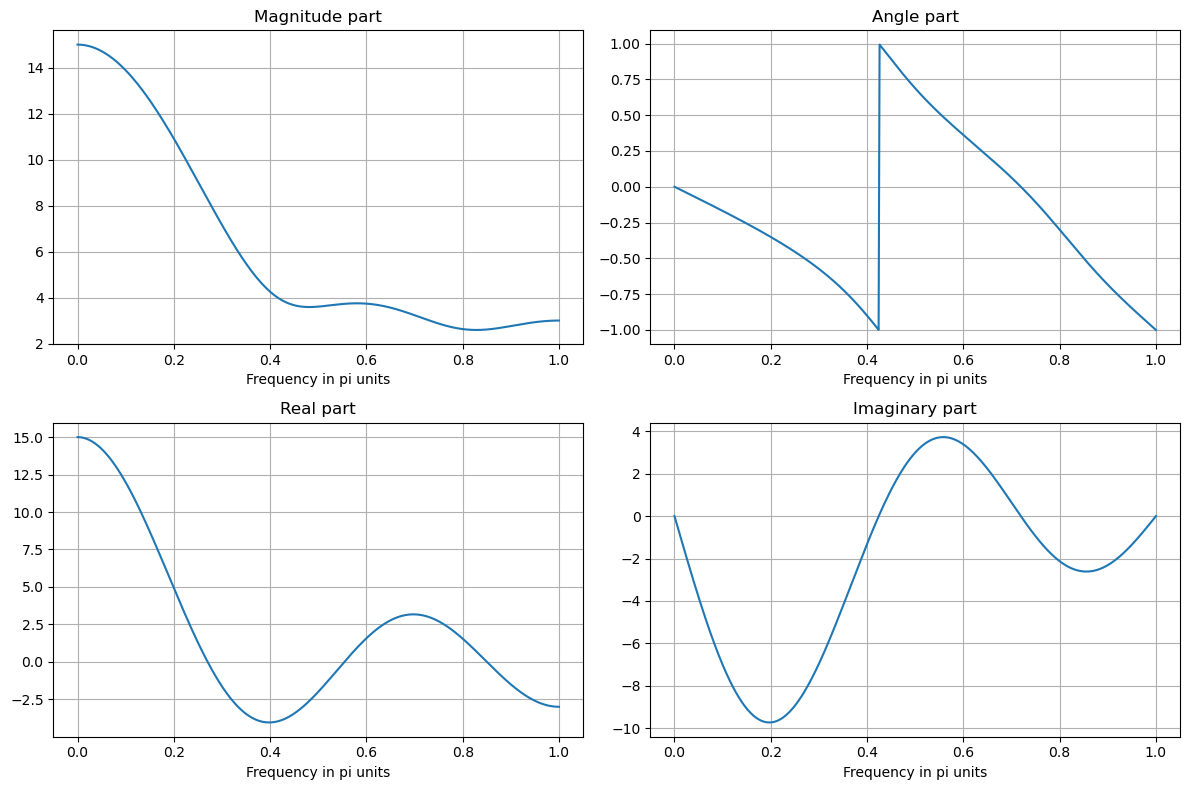

In [4]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(-1, 4)
x = np.arange(1, 6)
k = np.arange(501)
w = (np.pi / 500) * k
X = np.sum(x[:, np.newaxis] * np.exp(-1j * np.pi / 500 * n[:, np.newaxis] * k), axis=0)
magX = np.abs(X)
angX = np.angle(X)
realX = np.real(X)
imagX = np.imag(X)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(k / 500, magX)
plt.grid()
plt.xlabel('Frequency in pi units')
plt.title('Magnitude part')
plt.subplot(2, 2, 2)
plt.plot(k / 500, angX / np.pi)
plt.grid()
plt.xlabel('Frequency in pi units')
plt.title('Angle part')
plt.subplot(2, 2, 3)
plt.plot(k / 500, realX)
plt.grid()
plt.xlabel('Frequency in pi units')
plt.title('Real part')
plt.subplot(2, 2, 4)
plt.plot(k / 500, imagX)
plt.grid()
plt.xlabel('Frequency in pi units')
plt.title('Imaginary part')
plt.tight_layout()
plt.show()


# FFT

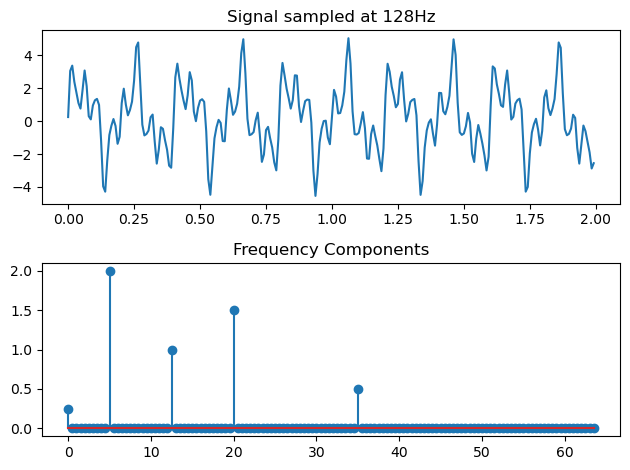

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 256
T = 1 / 128
k = np.arange(N)
time = k * T
f = 0.25 + 2 * np.sin(2 * np.pi * 5 * k * T) + np.sin(2 * np.pi * 12.5 * k * T) + 1.5 * np.sin(2 * np.pi * 20 * k * T) + 0.5 * np.sin(2 * np.pi * 35 * k * T)

plt.subplot(2, 1, 1)
plt.plot(time, f)
plt.title('Signal sampled at 128Hz')

F = np.fft.fft(f)
magF = np.abs(np.concatenate(([F[0] / N], F[1:N // 2] / (N / 2))))
hertz = k[:N // 2] * (1 / (N * T))

plt.subplot(2, 1, 2)
plt.stem(hertz, magF)
plt.title('Frequency Components')

plt.tight_layout()
plt.show()



